In [2]:
import pandas as pd                                     #importing all necesary libraries
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt  


In [3]:
data = pd.read_csv("student_scores.csv")              #reading csv file data set

FileNotFoundError: [Errno 2] No such file or directory: 'student_scores.csv'

In [4]:
data                                           #displaying data

NameError: name 'data' is not defined

In [5]:
data.describe()                                              #describing the data

NameError: name 'data' is not defined

In [6]:
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Score vs Hours', fontsize= 18)      # Plotting the distribution of scores
plt.xlabel('Score',fontsize = 10)  
plt.ylabel('Hours', fontsize = 10)  
plt.show()

NameError: name 'data' is not defined

**The graph shows Positive Linear Relation between the number of hours studied and percentage score**

**Preparing the data for analysis**

In [4]:
X = data.iloc[:, :-1].values  #selecting column no. of hours of study
y = data.iloc[:, 1].values    #selecting scores column
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [1]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y,             #splitting the data into training and testing sets
                            test_size=0.2, random_state=0)            #using scikit-learn's built in function 

NameError: name 'X' is not defined

**Training the Algorithm**

In [6]:
from sklearn.linear_model import LinearRegression                     #Training the data
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training completed")

Training completed


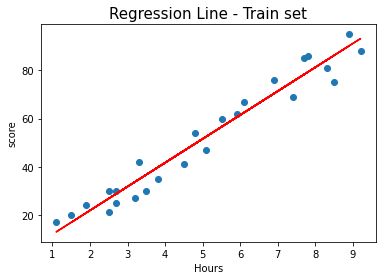

In [7]:
line = regressor.coef_*X+regressor.intercept_                          # Plotting the regression line
plt.scatter(X, y)                                                       #training dataset regression line
plt.plot(X, line, color = "red");
plt.xlabel("Hours", fontsize = 10)
plt.ylabel("score", fontsize = 10)
plt.title("Regression Line - Train set", fontsize = 15,)
plt.show()

**Making the predictions**

In [8]:
print(X_test)                                                      # Testing data - In Hours
y_pred = regressor.predict(X_test)                                 # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [9]:
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [10]:
#Parameters used for the model 
regressor.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [11]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})          #Comparison between predicted and test data
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


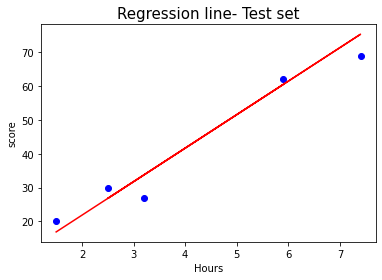

In [13]:
plt.plot(X_test, y_pred, color = "red") 
plt.scatter(X_test, y_test, color = "blue")                          #Using scatter plot for test data set
plt.xlabel("Hours", fontsize = 10)
plt.ylabel("score", fontsize = 10)
plt.title("Regression line- Test set", fontsize =15)
plt.show()

### Evaluation of model

**Accuracy of the Model**

In [12]:
from sklearn import metrics                                             #Calculating Accuracy of the model
metrics.r2_score(y_test, y_pred)

0.9454906892105356

**94% Accuracy**

**Prediction of score**

In [13]:
predict_score = regressor.predict([[9.25]])
print("The percentage score for studied hours 9.25 -- ", predict_score)

The percentage score for studied hours 9.25 --  [93.69173249]


In [14]:
print('Mean Square Error', metrics.mean_squared_error(y_test, y_pred))

Mean Square Error 21.5987693072174
